# 1D J1J2J3: Inference (2nd set w grad clipping) with 10k samples

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In the 2nd set of VMC experiments, only 2 cases are of interest: $(J_2, J_3) = (0.2, 0.5)$ and $(J_2, J_3) = (0.5, 0.2)$. Only 1 variant of Euclidean GRU ansatz was used: eGRU-60-s50, while various hyperbolic GRU ansatzes with different $ 53\leq d_h < 60$ were used, and the best one chosen to compare against Euclidean GRU. In this inference notebook, only the best results are included. 
- $(J_2, J_3) = (0.2, 0.5)$: Best hyperbolic GRU variant is hGRU-55-s50
- $(J_2, J_3) = (0.5, 0.2)$: Best hyperbolic GRU variant is hGRU-57-s50
  
The number of samples used for estimation here is 10000. Some experiments have been performed with gradient clipping to ensure stability of the training. 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
from j1j2j3_hyprnn_train_loop import *

2025-11-27 21:35:44.968405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
def define_load_test(wf, numsamples, weight_link, Ee):
    test_samples_before = wf.sample(numsamples,2)
    print(f'The number of samples is {len(test_samples_before)}')
    test_gs_before = J1J2J3_local_energies(wf, N, J1, J2, J3, Bz, numsamples, test_samples_before, True)   
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(numsamples,2)
    test_gs_after =  J1J2J3_local_energies(wf, N, J1, J2, J3, Bz, numsamples, test_samples_after, True)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)    
    #wf.model.summary()
    #print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')
    print(f'Exact energy is {np.round(Ee,4)}')

In [3]:
N=30
Bz=+0.0*np.ones(N)
numsamples = 10000

In [5]:
fname_s2 = '../results_s2'
fname_s2_gc = '../results_s2_gc'

# J2 =0.2, J3=0.5

In [5]:
J1_ = 1.0
J2_ = 0.2
J3_ = 0.5
E_02_05 = -14.640825798

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

## EuclGRU: 60 units

In [14]:
print('EUCLGRU: 60 UNITS')
#Same original training, but with longer duration
t1 = time.time()
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 60, seed = 181)
wl_gru=f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns=50_MsTrue_var2_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_02_05)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLGRU: 60 UNITS
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (11.490012168884277-0.005562779027968645j), var E = 1.9672662019729614
After loading weights, the ground state energy mean and variance are:
Mean E = (-14.584590911865234-0.0030357157811522484j), var E = 0.9664650559425354
Exact energy is -14.6408
Time taken for this infererence is t=2623.542 secs


## HypGRU: 55 units

In [12]:
print('HYPGRU: 55 UNITS')
#Same original training, but with longer duration
t1 = time.time()
wf_hgru2 = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 55, seed=181)
wl_hgru2 = f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns=50_MsTrue_svlst_checkpoint.weights.h5'
define_load_test(wf_hgru2, numsamples, wl_hgru2, E_02_05)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

HYPGRU: 55 UNITS
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (10.603678703308105+0.006538476794958115j), var E = 3.7509944438934326
After loading weights, the ground state energy mean and variance are:
Mean E = (-14.581340789794922-0.004030222538858652j), var E = 1.1208094358444214
Exact energy is -14.6408
Time taken for this infererence is t=3015.509 secs


# J2 =0.5, J3=0.2

In [10]:
J1_ = 1.0
J2_ = 0.5
J3_ = 0.2
E_05_02 =-11.528738924

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

## EuclGRU: 60 units

In [11]:
print('EUCLGRU: 60 UNITS')
#Use the original weights as no new training was performed
t1 = time.time()
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 60, seed = 111)
wl_gru=f'{fname_s2}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru, numsamples, wl_gru, E_05_02)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLGRU: 60 UNITS
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (11.765454292297363+0.0005661567556671798j), var E = 1.2453041076660156
After loading weights, the ground state energy mean and variance are:
Mean E = (-11.307320594787598+0.002591722412034869j), var E = 0.311906635761261
Exact energy is -11.5287
Time taken for this infererence is t=2692.859 secs


## HypGRU 57 units

In [12]:
print('HYPGRU: 57 UNITS (GRADIENT CLIPPING BY VALUE OF [-3,3]')
t1 = time.time()
wf_hgru2 = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 57, seed=151)
wl_hgru2 = f'{fname_s2_gc}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru2, numsamples, wl_hgru2, E_05_02)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

HYPGRU: 57 UNITS (GRADIENT CLIPPING BY VALUE OF [-3,3]
The number of samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = (11.466059684753418-0.009688949212431908j), var E = 2.1952579021453857
After loading weights, the ground state energy mean and variance are:
Mean E = (-11.33219051361084+0.0018475023098289967j), var E = 0.20267713069915771
Exact energy is -11.5287
Time taken for this infererence is t=3167.623 secs


# Convergence curves

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'pink','purple', 'brown']
def plot_res_meanE(ax, Ee, e_list, e_names, j23, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), np.real(e_list[i]),color = color_l[i], label = e_names[i])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",fontsize = 15)
       
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1)    
    for i in range(len(e_list)):
        ax2.plot(np.arange(len(e_list[i])), e_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)
    
color_l =  ['cyan', 'green', 'pink','purple', 'brown']
def plot_res_var(ax, v_list, e_names, j23, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",
              fontsize = 15)
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1 )
    for i in range(len(v_list)):
        ax2.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

In [6]:
###################################### (J2, J3) = (0.2, 0.5) #######################################
mE02_05 = np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns50_MsTrue_var2_meanE.npy')
vE02_05 = np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns=50_MsTrue_var2_varE.npy')

mEh02_05l =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_05l =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.5, 0.2) #######################################
mE05_02 = np.load(f'{fname_s2}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns50_MsTrue_meanE.npy')
vE05_02 = np.load(f'{fname_s2}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns=50_MsTrue_varE.npy')

mEh05_02_gc3 =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_02_gc3 =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns=50_MsTrue_varE.npy')

In [7]:
E_02_05 = -14.640825798
E_05_02 = -11.528738924

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_28520/268795165.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-J3-N=30_add.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


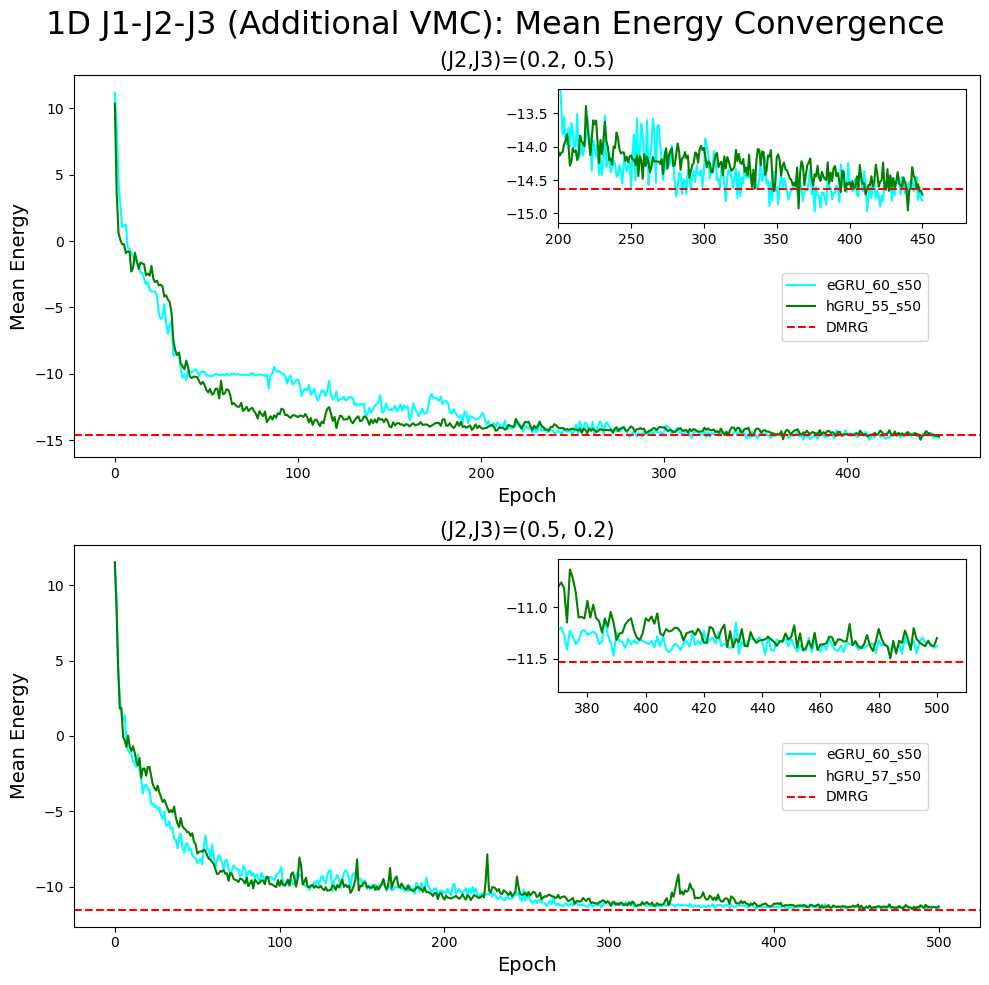

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), tight_layout=True)

e_list02_05 = [mE02_05[:451], mEh02_05l[:451]]
e_names1 = ['eGRU_60_s50',  'hGRU_55_s50']


e_list05_02 = [mE05_02[:501], mEh05_02_gc3 ]
e_names2 = ['eGRU_60_s50',  'hGRU_57_s50']

plot_res_meanE(ax[0], E_02_05, e_list02_05, e_names1, [0.2,0.5], [200,480, E_02_05-0.5, E_02_05+1.5], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1], E_05_02, e_list05_02, e_names2, [0.5, 0.2], [370,510,E_05_02-0.3, E_05_02+1.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D J1-J2-J3 (Additional VMC): Mean Energy Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30_add.png')

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_28520/2065644273.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-J3-N=30-var_add.png')


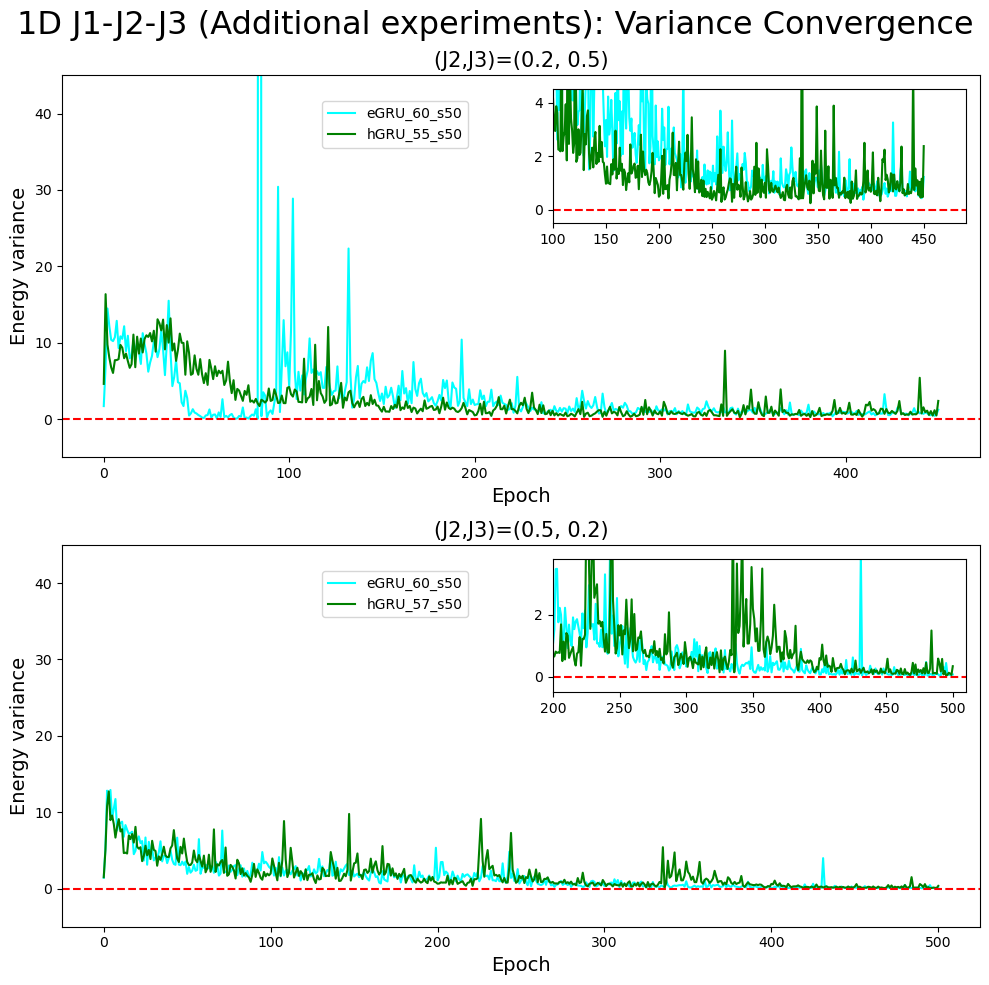

In [9]:
fig, ax = plt.subplots(2,1, figsize=(10, 10), tight_layout=True)

e_list02_05 = [vE02_05[:451], vEh02_05l[:451]]
e_list05_02 = [vE05_02[:501], vEh05_02_gc3]

plot_res_var(ax[0],  e_list02_05, e_names1, [0.2,0.5], [100,490, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1], e_list05_02, e_names2, [0.5, 0.2], [200,510,-0.5, 3.8], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3 (Additional experiments): Variance Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30-var_add.png')